In [1]:
__author__ = 'Mike Fitzpatrick <mike.fitzpatrick@noirlab.edu>, Glenn Eychaner, Robert Nikutta <robert.nikutta@noirlab.edu>'
__version__ = '20241002'
__datasets__ = ['sdss_dr16']

# How to Use the Data Lab Public File Services

_Mike Fitzpatrick, Glenn Eychaner, Robert Nikutta_

# Table of Contents

* [Notebook Summary](#summary)
* [Disclaimer & Attribution](#disclaimer)
* [Imports & Setup](#imports)
* [Listing another user's 'public/' folder in their vospace](#listing-public)
* [An example using the SDSS DR16 public file service](#example-file-service)
* [List all available public file spaces](#list-file-services)

<a class="anchor" id="summary"></a>
# Notebook Summary

Files in the virtual storage are usually identified via the prefix `vos://`. This shorthand identifier is resolved to a user's home directory of the storage space in the service.  

If the `vos://` prefix is instead the name of another user (e.g. `demo00://`, and the remainder of the path grants public or group read/write access, then the other user's spaces will be accessed. Most user spaces have a `/public` directory to facilitate file sharing (e.g. `demo00://public/foo.fits` will access the `foo.fits` file from user `demo00`). Users can make any file (or directory) public by moving it to (or creating a link in) their `/public` directory.

_Public file services_ are specially created areas where all files are world-readable, and are used for serving files from Data Lab datasets.

<a class="anchor" id="disclaimer"></a>
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="imports"></a>
# Imports and setup

In [2]:
# 3rd Party Imports
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

# Standard DL imports, note we only need storeClient
from dl import storeClient as sc

# Make matplotlib plot inline
%matplotlib inline

<a class="anchor" id="listing-public"></a>
# Listing another user's 'public/' folder in their vospace
The user in our example is 'demo00'

In [3]:
print(sc.ls('demo00://public',format='short'))

test2.csv       test3.csv       test6.csv        



<a class="anchor" id="example-file-service"></a>
# An example using the **SDSS DR16** public file service.
A 'file service' is a _public_ vospace, readable by all users.

## Set base directory and plate number

In [4]:
# Set the base directory and plate number
# These can be found by explring the SDSS DR16 space using 'sc.ls()'
print(sc.ls('sdss_dr16://'))
print(sc.ls('sdss_dr16://eboss'))
print(sc.ls('sdss_dr16://eboss/spectro'))
print(sc.ls('sdss_dr16://eboss/spectro/redux'))

base = 'sdss_dr16://eboss/spectro/redux/v5_13_0/'
plate = '3615'

apo,apogee,eboss,env,lco,manga,marvels,public,sdss,tmp
calib,elg,lss,lya,photo,photoObj,qso,resolve,spectro,spiders,sweeps,target
data,firefly,lensing,redux
images,platelist-mjdsort.html,platelist-mjdsort.txt,platelist.fits,platelist.html,platelist.txt,platequality-mjdsort.html,platequality-mjdsort.txt,platequality.html,platequality.txt,v5_13_0


## List all available FITS plate files in the plate directory

In [5]:
# Construct the vospace path to the plate directory
spPlate = base + plate + '/spPlate-' + plate
print(sc.ls(spPlate + '*.fits',format='short'))

spPlate-3615-55089.fits  spPlate-3615-55099.fits  spPlate-3615-55145.fits
spPlate-3615-55153.fits  spPlate-3615-55179.fits  spPlate-3615-55208.fits
spPlate-3615-55445.fits  spPlate-3615-55856.fits  spPlate-3615-56219.fits
spPlate-3615-56544.fits                            



## Pick a modified Julian date and fiber

In [6]:
mjd = '56544'
fiber = 39

# Construct the vospace path to the plate file and verify
spfile = spPlate + '-' + mjd + '.fits'
print('File:',spfile)
print(sc.ls(spfile))

File: sdss_dr16://eboss/spectro/redux/v5_13_0/3615/spPlate-3615-56544.fits
spPlate-3615-56544.fits


## Now read the spectrum from the file and construct the wavelength array

In [7]:
try:
    with fits.open(sc.get(spfile, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
        sky = hdulist[6].data[fiber-1, :]
except Exception as e:
    raise ValueError("Could not find spPlate file for plate={0:s}, mjd={1:s}!".format(plate, mjd))

loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
wavelength = 10.0**loglam
print("Number of elements in the flux, ivar, wavelength arrays: {} {} {}".format(len(flux),len(ivar),len(wavelength)))

Number of elements in the flux, ivar, wavelength arrays: 4646 4646 4646


## Make a plot of the spectrum

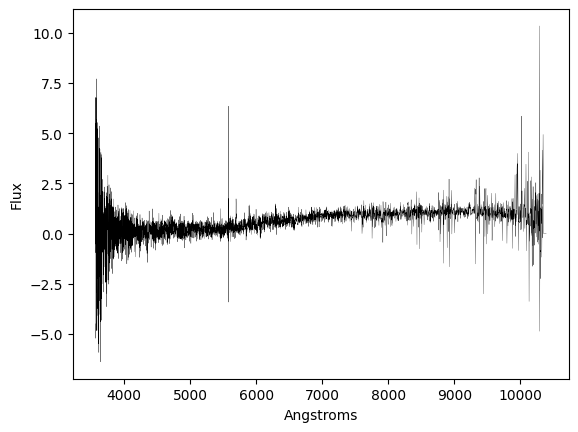

In [8]:
plt.plot(wavelength, flux * (ivar > 0), 'k', lw=0.2)
plt.xlabel('Angstroms')
plt.ylabel('Flux');

<a class="anchor" id="list-file-services"></a>
## List all available public file spaces

The `sc.services()` function allows a user to list all the available file services.

In [9]:
print(sc.services())


                    name   svc   description
                --------   ----  --------
                  ls_dr5   vos   DECam Legacy Survey DR5
                  ls_dr4   vos   DECam Legacy Survey DR4
                 chandra   vos   ChaMPlane: Measuring the Faint X-ray Bin ...
             cosmic_dawn   vos   Cosmic DAWN survey
               deeprange   vos   Deeprange Survey
           deep_ecliptic   vos   Deep Ecliptic Survey
                 des_dr2   vos   Dark Energy Survey DR2
                desi_ets   vos   DESI Early Target Selection
                     dls   vos   Deep Lens Survey
                  flamex   vos   FLAMINGOS Extragalactic Survey
                     fls   vos   First Look Survey
                    fsvs   vos   Faint Sky Variability Survey
               gnirs_dqs   vos   Gemini Near-IR Spectroscopic-Distant Qua ...
               ir_bootes   vos   Infrared Bootes Imaging Survey
                     lgs   vos   Local Group Survey
             gogreen_dr1  